# Lead Funnel Conversion Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('marketing_dummy_datasets/lead_conversion_funnel_data.csv')
df.head()

,LeadID,Lead Source,Lead Score,Converted
0,L0001,Twitter,22,No
1,L0002,Google Ads,90,No
2,L0003,Twitter,15,No
3,L0004,Facebook,92,Yes
4,L0005,Email,86,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LeadID       500 non-null    object
 1   Lead Source  500 non-null    object
 2   Lead Score   500 non-null    int64 
 3   Converted    500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
df.describe(include='all')

,leadid,lead_source,lead_score,converted
count,500,500,500.000000,500
unique,500,5,NaN,2
top,L0001,Google Ads,NaN,No
freq,1,166,NaN,314
mean,NaN,NaN,55.810000,NaN
std,NaN,NaN,26.648418,NaN
min,NaN,NaN,10.000000,NaN
25%,NaN,NaN,32.000000,NaN
50%,NaN,NaN,57.500000,NaN
75%,NaN,NaN,79.000000,NaN


In [16]:
df['converted_flag'] = df['converted'].map({"Yes": 1, "No": 0})
conversion_rate = df['converted_flag'].mean()
print(f"Overall Conversion Rate: {conversion_rate:.2%}")

Overall Conversion Rate: 37.20%


Overall conversion rate is 37.2%, which is a decent baseline across all lead sources.

## Lead Score Distribution by Conversion Status

/tmp/ipykernel_56294/2909700702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df, x= 'converted', y= 'lead_score', palette= 'Set2')


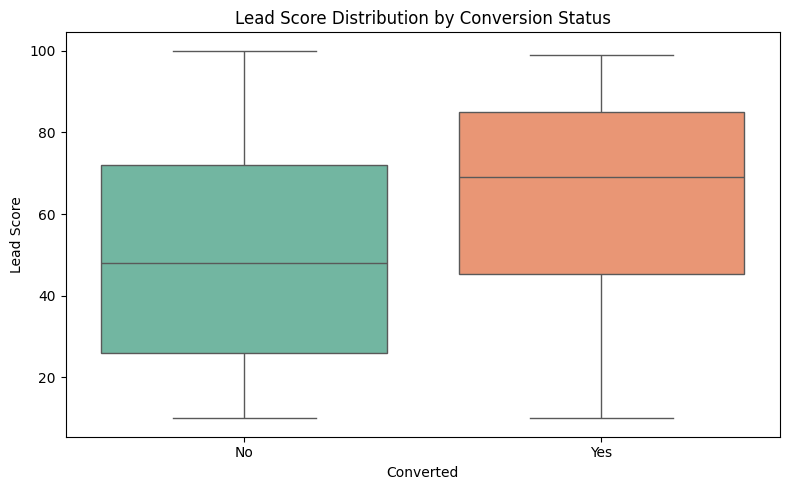

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data= df, x= 'converted', y= 'lead_score', palette= 'Set2')
plt.title('Lead Score Distribution by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Lead Score')
plt.tight_layout()
plt.show()

This boxplot illustrates a strong positive relationship between lead score and conversion likelihood:

- **Converted leads** generally have **higher lead scores**, with a median around **70**.
- **Non-converted leads** have a **wider spread** and a lower median near **45**, with more low-scoring outliers.
- The difference in distribution confirms that **lead score is a meaningful predictor of conversion**, but not perfect — some high-scoring leads still fail to convert.

> This validates the use of lead scoring in prioritizing outreach but suggests the need for further segmentation or personalized follow-ups to close high-potential leads.

## Conversion Rate by Lead Score 

In [20]:
# Compute conversion rate by lead source
conversion_by_source = df.groupby('lead_source')['converted_flag'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)
conversion_by_source.rename(columns={'count': 'Total Leads', 'sum': 'Converted Leads', 'mean': 'Conversion Rate'}, inplace=True)

conversion_by_source.head()

,Total Leads,Converted Leads,Conversion Rate
lead_source,,,
Email,81,33,0.407407
Google Ads,166,64,0.385542
Facebook,123,45,0.365854
Twitter,45,16,0.355556
LinkedIn,85,28,0.329412


In [22]:
conversion_by_source.style.background_gradient(cmap= 'YlGnBu')

,Total Leads,Converted Leads,Conversion Rate
lead_source,,,
Email,81,33,0.407407
Google Ads,166,64,0.385542
Facebook,123,45,0.365854
Twitter,45,16,0.355556
LinkedIn,85,28,0.329412


- Email generates the highest conversion rate (41%).
- LinkedIn performs the worst (33%), suggesting possible drop-offs or misalignment in lead qualification.

In [24]:
conversion_by_source = conversion_by_source.reset_index()

/tmp/ipykernel_56294/499025839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_by_source, x='lead_source', y='Conversion Rate', palette='viridis')


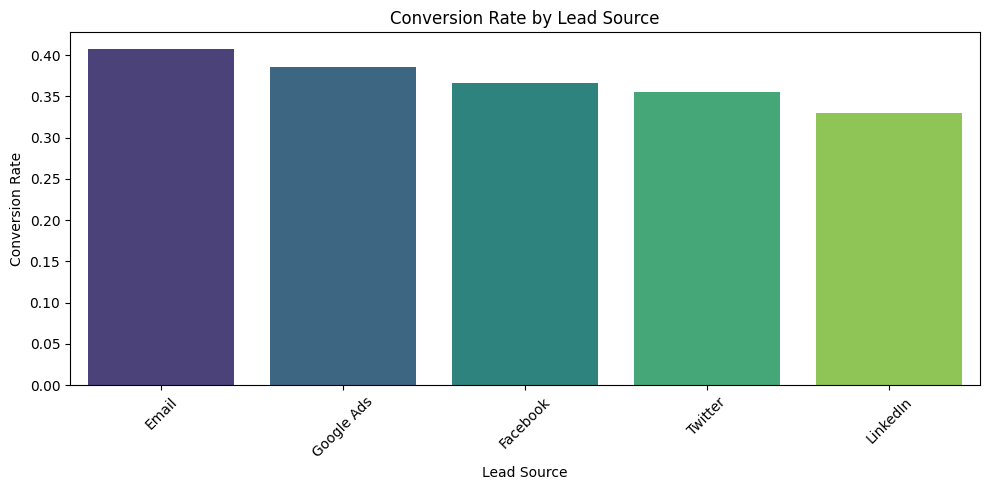

In [26]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=conversion_by_source, x='lead_source', y='Conversion Rate', palette='viridis')
plt.title("Conversion Rate by Lead Source")
plt.xlabel("Lead Source")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Lead Score Distribution by Conversion Status

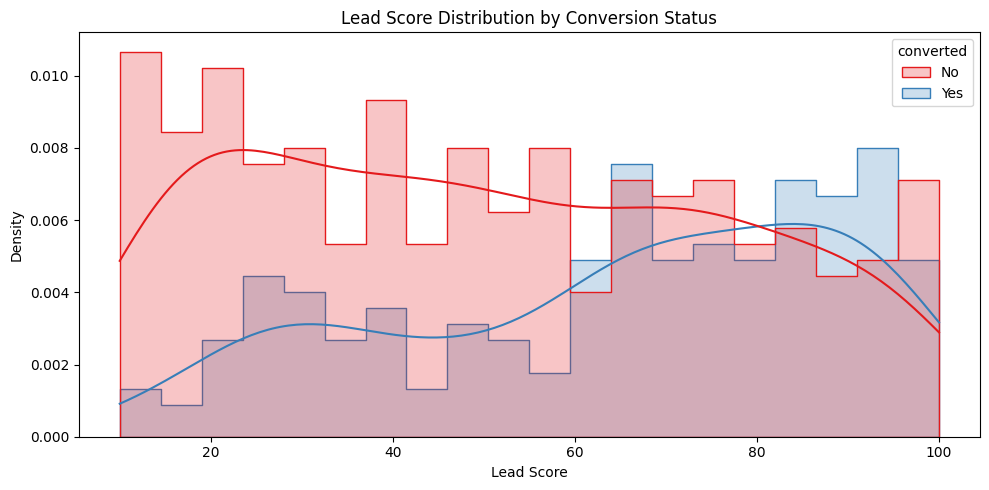

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='lead_score', hue='converted', bins=20, kde=True,
             element='step', stat='density', palette='Set1')
plt.title("Lead Score Distribution by Conversion Status")
plt.xlabel("Lead Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

This histogram reveals clear behavioral differences between leads who converted and those who didn’t:

- **Converted leads** cluster around **higher Lead Scores** — peaking between **70 and 90**.
- **Non-converted leads** dominate the lower score range, especially between **10 and 60**, with a sharp drop-off beyond 70.
- There is a **strong positive trend**: as Lead Score increases, so does the likelihood of conversion.
- However, some high-scoring leads still do not convert, indicating that **Lead Score alone isn't a perfect predictor** — other factors like timing, follow-up, or relevance may also impact final conversion.

> This validates Lead Score as a valuable tool for prioritizing leads, but also suggests the need for additional segmentation or better follow-up strategies for high-scoring but unconverted leads.

## Conclusion

- The **overall lead conversion rate is 37.2%**, which is reasonable but leaves room for optimization.
- **Lead Score is positively associated with conversion** — converted leads tend to have significantly higher scores.
- **Email leads convert at the highest rate (40.7%)**, while **LinkedIn lags behind (32.9%)**, despite similar lead volumes.
- Some **high-scoring leads (70+) still fail to convert**, particularly from **Google Ads and LinkedIn**, suggesting possible inefficiencies in lead handling or follow-up processes.

---

### Recommendations:

1. **Prioritize High-Scoring Leads**  
   - Leads with scores **≥ 70** should receive **fast-tracked outreach** by the sales team.
   - Automate alerts or workflows for immediate follow-up on high-potential leads.

2. **Audit Underperforming Channels**  
   - Investigate why **LinkedIn and Google Ads** underperform despite generating high scores.
   - Review targeting, messaging, or post-lead follow-up strategies.

3. **Refine Lead Scoring Model**  
   - Consider incorporating behavioral or firmographic data to improve predictive power.
   - A correlation of **0.26** indicates that **Lead Score is helpful, but not sufficient** alone.

4. **Nurture Low-Score Leads**  
   - Don’t discard low-score leads outright. Instead, feed them into a **drip campaign** for long-term nurturing.
   - Track whether engagement increases their conversion propensity over time.

5. **Build a Conversion Dashboard**  
   - Track conversion rates, lead score distribution, and lead aging by channel.
   - Monitor trends monthly to detect drop-offs or bottlenecks in the funnel early.

> By improving how we score, prioritize, and engage with leads—especially high-potential ones—we can meaningfully increase conversion efficiency and reduce funnel leakage.
